In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, parser="auto")

In [2]:
X, y = mnist.data, mnist.target

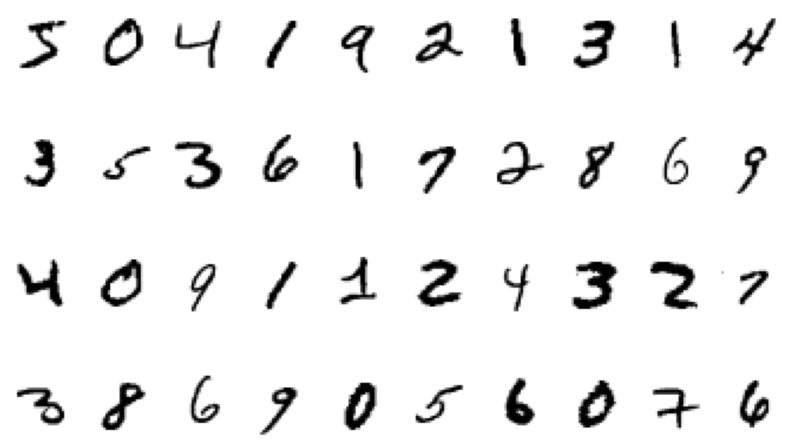

In [3]:
import matplotlib.pyplot as plt

def plot_multiple_digits(images, num_images, num_rows, num_cols):
    plt.figure(figsize=(10, 6))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        image = images[i].reshape(28, 28)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
    plt.show()

plot_multiple_digits(X, num_images=40, num_rows=4, num_cols=10)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', parser="auto")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

model = DecisionTreeClassifier(random_state=42)
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=y_train, y_pred=y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 86.41 %


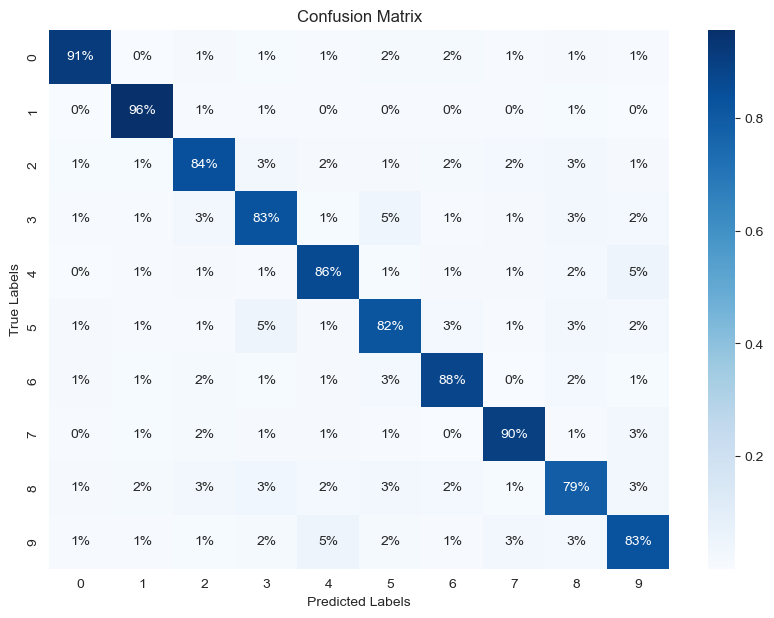

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(true_y, pred_y):
    conf_matrix = confusion_matrix(y_true=true_y, y_pred=pred_y, normalize="true")
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt=".0%", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

print_confusion_matrix(y_train, y_pred)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=42, n_estimators=100)
y_pred_rfc = cross_val_predict(model_rfc, X_train, y_train, cv=5)

In [10]:
accuracy_rfc = accuracy_score(y_true=y_train, y_pred=y_pred_rfc)
print("Accuracy:", round(accuracy_rfc * 100, 2), "%")

Accuracy: 96.71 %


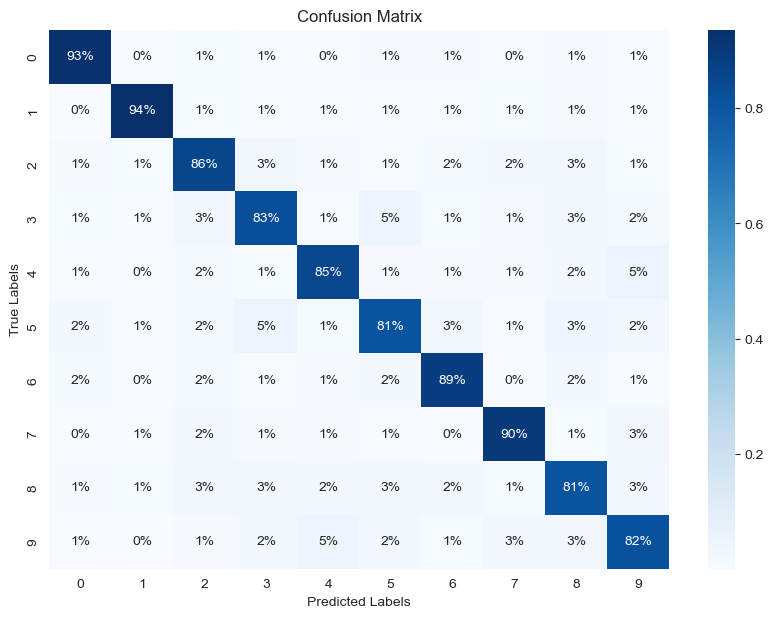

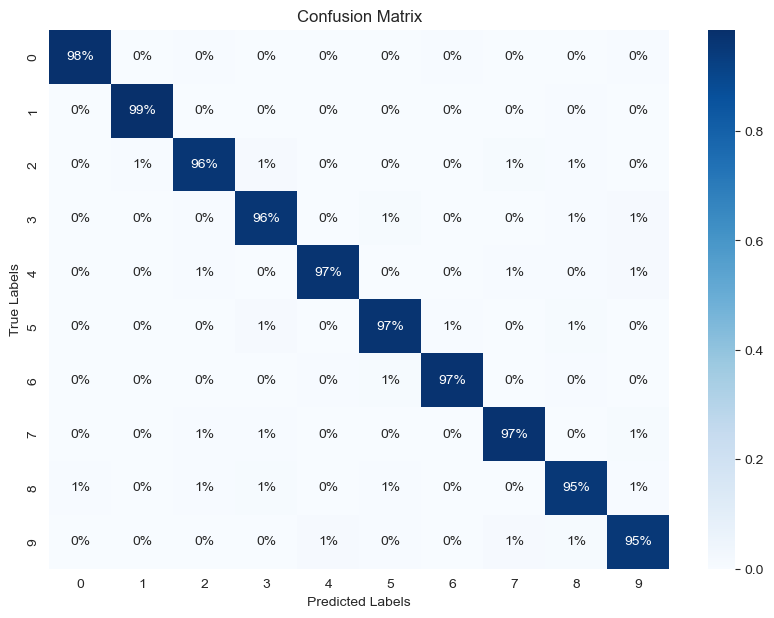

In [11]:
print_confusion_matrix(y_pred, y_train)
print_confusion_matrix(y_pred_rfc, y_train)

In [12]:
model_rfc.fit(X_train, y_train)
y_pred_test = model_rfc.predict(X_test)

In [13]:
accuracy_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print("Accuracy:", round(accuracy_test * 100, 2), "%")

Accuracy: 96.7 %


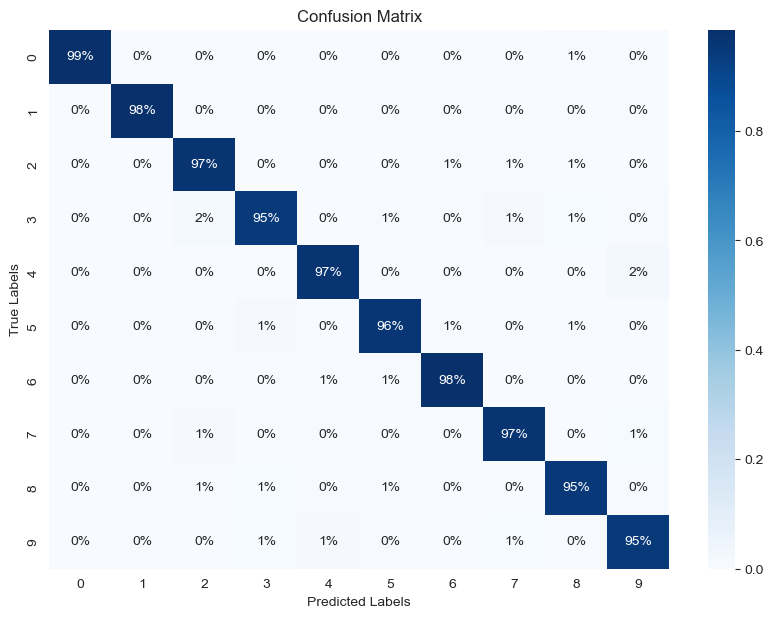

In [14]:
print_confusion_matrix(y_test, y_pred_test)